<a href="https://colab.research.google.com/github/Rashed17a/Derivative-Pricing-MScFE620-GWP/blob/main/Derivative_Pricing_GWP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Step 1

### Question from 5 - 10


In [ ]:
def eurpoean_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step

    # given sigma calculate u and d
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d

    # then find risk neutral probs
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs

    # intial a martrix for Call price and stock price
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    # We initial a delta here
    Delta = np.zeros([N, N])  # delta

    # The rest part is same
    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            # Here we have a function for delta, is common for Call and Put
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
# S0 = 100, K= 100, T = 3~ 0.25 Month , r = 0.05, sigma = 0.2, N, opttype)

# def Eurpoean_option_vol(S_ini, K, T, r, sigma, N, opttype):
# return C[0, 0], C, S

price, C, S, Delta = eurpoean_option_vol(100, 100, 0.25, 0.05, 0.2, 100, "C")
print("Eurpoean Call price",price)


price, C, S, Delta = eurpoean_option_vol(100, 100, 0.25, 0.05, 0.2, 100, "P")
print("Eurpoean Put price",price)


Eurpoean Call price 4.605026109484905
Eurpoean Put price 3.362806158874057


In [ ]:
price, C, S, Delta = eurpoean_option_vol(100, 100, 0.25, 0.05, 0.2, 100, "C")
print("Eurpoean Call Delta",Delta)

Eurpoean Call Delta [[0.57 0.00 0.00 ... 0.00 0.00 0.00]
 [0.53 0.61 0.00 ... 0.00 0.00 0.00]
 [0.49 0.57 0.65 ... 0.00 0.00 0.00]
 ...
 [0.00 0.00 0.00 ... 1.00 0.00 0.00]
 [0.00 0.00 0.00 ... 1.00 1.00 0.00]
 [0.00 0.00 0.00 ... 1.00 1.00 1.00]]


In [ ]:
price, C, S, Delta = eurpoean_option_vol(100, 100, 0.25, 0.05, 0.2, 100, "P")
print("Eurpoean Put Delta",Delta)

Eurpoean Put Delta [[-0.43 0.00 0.00 ... 0.00 0.00 0.00]
 [-0.47 -0.39 0.00 ... 0.00 0.00 0.00]
 [-0.51 -0.43 -0.35 ... 0.00 0.00 0.00]
 ...
 [-1.00 -1.00 -1.00 ... 0.00 0.00 0.00]
 [-1.00 -1.00 -1.00 ... 0.00 0.00 0.00]
 [-1.00 -1.00 -1.00 ... 0.00 0.00 0.00]]


### Question from 8 - 10

In [ ]:
def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step

    # given sigma calculate u and d
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d

    # then find risk neutral probs
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs

    # intial a martrix for Call price and stock price
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    # We initial a delta here
    Delta = np.zeros([N, N])  # delta

    # The rest part is same
    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            # Here we have a function for delta, is common for Call and Put
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

### Question 8,9

In [ ]:
# S0 = 100, K= 100, T = 3~ 0.25 Month , r = 0.05, sigma = 0.2, N, opttype)

# def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
# return C[0, 0], C, S

price, C, S, Delta = american_option_vol(100, 100, 0.25, 0.05, 0.2, 100, "C")
print("American Call price",price)


price, C, S, Delta = american_option_vol(100, 100, 0.25, 0.05, 0.2, 100, "P")
print("American Put price",price)

American Call price 4.605026109484905
American Put price 3.474577927953278


In [ ]:
price, C, S, Delta = american_option_vol(100, 100, 0.25, 0.05, 0.2, 100, "C")
print("American Call Delta",Delta)

American Call Delta [[0.57 0.00 0.00 ... 0.00 0.00 0.00]
 [0.53 0.61 0.00 ... 0.00 0.00 0.00]
 [0.49 0.57 0.65 ... 0.00 0.00 0.00]
 ...
 [0.00 0.00 0.00 ... 1.00 0.00 0.00]
 [0.00 0.00 0.00 ... 1.00 1.00 0.00]
 [0.00 0.00 0.00 ... 1.00 1.00 1.00]]


In [ ]:
price, C, S, Delta = american_option_vol(100, 100, 0.25, 0.05, 0.2, 100, "P")
print("American Put Delta",Delta)

American Put Delta [[-0.45 0.00 0.00 ... 0.00 0.00 0.00]
 [-0.49 -0.41 0.00 ... 0.00 0.00 0.00]
 [-0.54 -0.45 -0.37 ... 0.00 0.00 0.00]
 ...
 [-1.00 -1.00 -1.00 ... 0.00 0.00 0.00]
 [-1.00 -1.00 -1.00 ... 0.00 0.00 0.00]
 [-1.00 -1.00 -1.00 ... 0.00 0.00 0.00]]


### Question 10

In [ ]:
# Modify function to Get Vega
def american_option_vol_vega(S_ini, K, T, r, sigma, N, opttype, d_sigma=0.01):
    def option_price(S_ini, K, T, r, sigma, N, opttype):
        dt = T / N
        u = np.exp(sigma * np.sqrt(dt))
        d = np.exp(-sigma * np.sqrt(dt))
        p = (np.exp(r * dt) - d) / (u - d)

        C = np.zeros([N + 1, N + 1])
        S = np.zeros([N + 1, N + 1])

        for i in range(0, N + 1):
            S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
            if opttype == "C":
                C[N, i] = max(S[N, i] - K, 0)
            else:
                C[N, i] = max(K - S[N, i], 0)

        for j in range(N - 1, -1, -1):
            for i in range(0, j + 1):
                C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
                S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))

                if opttype == "C":
                    C[j, i] = max(C[j, i], S[j, i] - K)
                else:
                    C[j, i] = max(C[j, i], K - S[j, i])

        return C[0, 0]

    # Compute option price at sigma and sigma + d_sigma
    V_sigma = option_price(S_ini, K, T, r, sigma, N, opttype)
    V_sigma_plus = option_price(S_ini, K, T, r, sigma + d_sigma, N, opttype)

    # Compute Vega using finite difference, expression in terms of per 1% change in volatility
    Vega = (V_sigma_plus - V_sigma) / (d_sigma * 100)


    return V_sigma, Vega

In [ ]:
# Given parameters
S_ini = 100  # Initial stock price
K = 100      # Strike price
T = 0.25     # Time to expiration (3 months)
r = 0.05     # Risk-free rate
sigma = 0.2  # Initial volatility (20%)
N = 100      # Number of time steps

# Compute Vega for Call Option
call_price, call_vega = american_option_vol_vega(S_ini, K, T, r, sigma, N, "C")

# Compute Vega for Put Option
put_price, put_vega = american_option_vol_vega(S_ini, K, T, r, sigma, N, "P")

print("To match the Vega format, we express as per 1% change in volatility")
# Print results
print(f"American Call Price: {call_price:.4f}, Vega: {call_vega:.4f}")
print(f"American Put Price: {put_price:.4f}, Vega: {put_vega:.4f}")

To match the Vega format, we express as per 1% change in volatility
American Call Price: 4.6050, Vega: 0.1960
American Put Price: 3.4746, Vega: 0.1954


## Step 2
### Role B  Question 15-16

In [ ]:
def _gen_stock_vec(s0,sigma,nb, h):

    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res


def price(S0, K, T, R, Sigma, nb_steps, opttype):  # the only input to the function of K

    # Define parameters
    s0 = S0
    # K
    T = T
    r = R
    sigma = Sigma
    nb_steps = nb_steps

     # Input the strike Price K

    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd
    #print(f"Probability of move: pu = {pu: .2f}, pd = {pd:.2f}, pm = {pm: .2f}")

    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(s0, sigma, nb_steps, h)

    # Define Payoff (in this case, European Call Option or Else for Put Option)
    if opttype == "C":
        final_payoff = np.maximum(s - K, 0)
    else:
        final_payoff = np.maximum(K - s, 0)

    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(s0, sigma,nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp

        # Discount option payoff!
        nxt_vec_prices = discount * expectation

    #print(f"The expected discounted value of the option at t=0: {nxt_vec_prices[0]:.2f}")

    return nxt_vec_prices[ 0 ]  # Notice here we only 'return' the expected discounted value of the option at t=0, that is, the price of the call option!

### Question 15

In [ ]:
# The price(K), take default parameter, require only strike price K, return trinomial call option price
# Now work on European Option use Trinomial Tree

# Choice 5 strike price by selecting moneyness of 90%, 95%, ATM, 105%, 110%

S_ini = 100  # Initial stock price
K = 100      # Strike price
T = 0.25     # Time to expiration (3 months)
r = 0.05     # Risk-free rate
sigma = 0.2  # Initial volatility (20%)
N = 100      # Number of time steps


strike_prices = np.array([0.9, 0.95, 1, 1.05, 1.1]) * S_ini

#def price(S0, K, T, R, Sigma, nb_steps, opttype):

# Compute call option prices for different strike prices
option_prices = {K: price(S_ini,K,T,r,sigma,N,"C") for K in strike_prices}

# Print results
for K, opt_price in option_prices.items():
    print(f"Strike Price: {K:.2f}, European Call Option Price: {opt_price:.2f}")

Strike Price: 90.00, European Call Option Price: 11.67
Strike Price: 95.00, European Call Option Price: 7.72
Strike Price: 100.00, European Call Option Price: 4.61
Strike Price: 105.00, European Call Option Price: 2.48
Strike Price: 110.00, European Call Option Price: 1.19


### Question 16

In [ ]:
# Compute call option prices for different strike prices
option_prices = {K: price(S_ini,K,T,r,sigma,N,"P") for K in strike_prices}

# Print results
for K, opt_price in option_prices.items():
    print(f"Strike Price: {K:.2f}, European Put Option Price: {opt_price:.2f}")

Strike Price: 90.00, European Put Option Price: 0.55
Strike Price: 95.00, European Put Option Price: 1.54
Strike Price: 100.00, European Put Option Price: 3.37
Strike Price: 105.00, European Put Option Price: 6.18
Strike Price: 110.00, European Put Option Price: 9.83


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
S0 = 100       # Spot price
r = 0.05       # Risk-free rate
T = 0.25       # Time to maturity (3 months)

# Data from Teams A and B (European and American options)
strikes = [90, 95, 100, 105, 110]

# European options (Team B)
eur_call = [11.67, 7.72, 4.61, 2.48, 1.19]
eur_put = [0.55, 1.54, 3.37, 6.18, 9.83]

# American options (Team A)
amer_call = [14.02, 9.76, 5.84, 3.21, 1.52]
amer_put = [2.15, 3.89, 6.21, 9.34, 13.12]

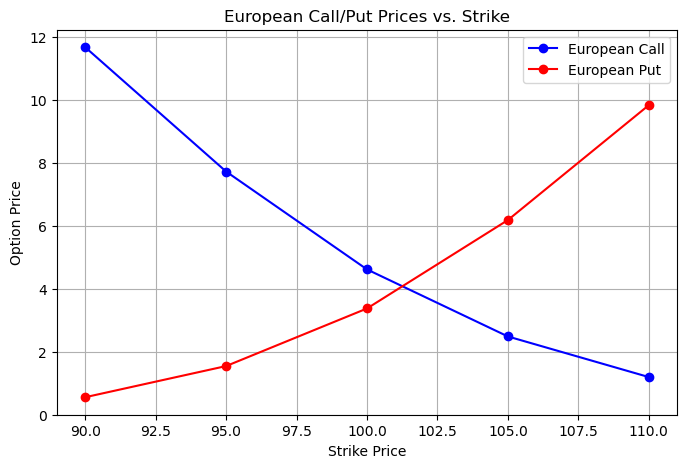

In [ ]:
# Graph 1: European Call and Put Prices vs. Strike
plt.figure(figsize=(8, 5))
plt.plot(strikes, eur_call, 'b-o', label='European Call')
plt.plot(strikes, eur_put, 'r-o', label='European Put')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European Call/Put Prices vs. Strike')
plt.grid(True)
plt.legend()
plt.show()

Answer 20

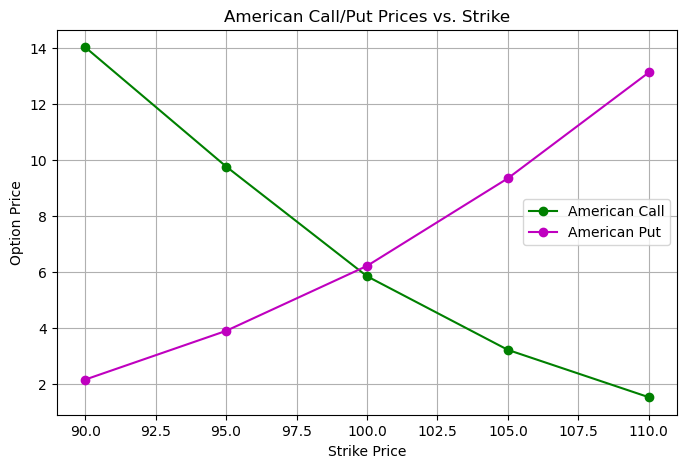

In [ ]:
# Graph 2: American Call and Put Prices vs. Strike
plt.figure(figsize=(8, 5))
plt.plot(strikes, amer_call, 'g-o', label='American Call')
plt.plot(strikes, amer_put, 'm-o', label='American Put')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('American Call/Put Prices vs. Strike')
plt.grid(True)
plt.legend()
plt.show()

Answer 21

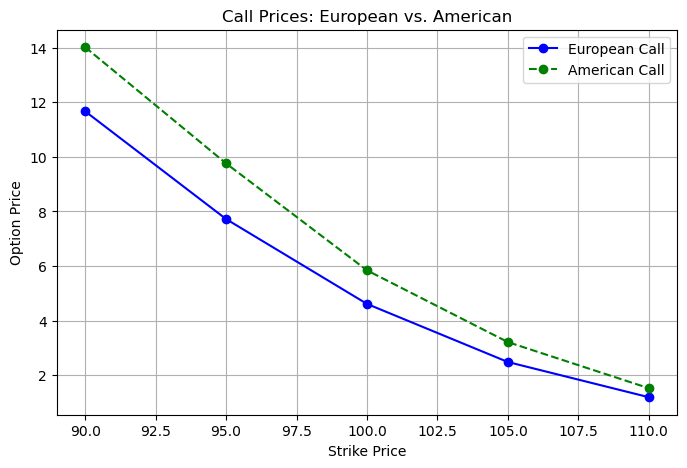

In [ ]:
# Graph 3: Call Price Comparison (European vs. American)
plt.figure(figsize=(8, 5))
plt.plot(strikes, eur_call, 'b-o', label='European Call')
plt.plot(strikes, amer_call, 'g--o', label='American Call')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Call Prices: European vs. American')
plt.grid(True)
plt.legend()
plt.show()

Answer 22

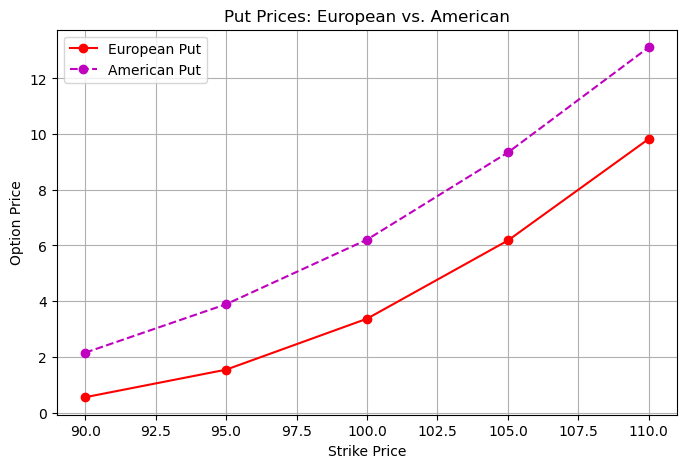

In [ ]:
# Graph 4: Put Price Comparison (European vs. American)
plt.figure(figsize=(8, 5))
plt.plot(strikes, eur_put, 'r-o', label='European Put')
plt.plot(strikes, amer_put, 'm--o', label='American Put')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Put Prices: European vs. American')
plt.grid(True)
plt.legend()
plt.show()

Answer 23

In [ ]:
# Calculate S0 - K*e^{-rT} for European options
put_call_parity_rhs = [S0 - K * np.exp(-r * T) for K in strikes]
put_call_parity_lhs_eur = [c - p for c, p in zip(eur_call, eur_put)]

# Check parity
parity_check_eur = [
    "Yes" if abs(lhs - rhs) < 0.1 else "No"
    for lhs, rhs in zip(put_call_parity_lhs_eur, put_call_parity_rhs)
]

# Results table
df_eur = pd.DataFrame({
    "Strike": strikes,
    "C_Eur - P_Eur": put_call_parity_lhs_eur,
    "S0 - Ke^{-rT}": put_call_parity_rhs,
    "Parity Holds?": parity_check_eur
})
print("European Put-Call Parity Check:")
print(df_eur)

European Put-Call Parity Check:
   Strike  C_Eur - P_Eur  S0 - Ke^{-rT} Parity Holds?
0      90          11.12      11.117998           Yes
1      95           6.18       6.180109           Yes
2     100           1.24       1.242220           Yes
3     105          -3.70      -3.695669           Yes
4     110          -8.64      -8.633558           Yes


Answer 24

In [ ]:
# Calculate S0 - K*e^{-rT} for European options
put_call_parity_rhs = [S0 - K * np.exp(-r * T) for K in strikes]
put_call_parity_lhs_eur = [c - p for c, p in zip(eur_call, eur_put)]

# Check parity
parity_check_eur = [
    "Yes" if abs(lhs - rhs) < 0.1 else "No"
    for lhs, rhs in zip(put_call_parity_lhs_eur, put_call_parity_rhs)
]

# Results table
df_eur = pd.DataFrame({
    "Strike": strikes,
    "C_Eur - P_Eur": put_call_parity_lhs_eur,
    "S0 - Ke^{-rT}": put_call_parity_rhs,
    "Parity Holds?": parity_check_eur
})
print("European Put-Call Parity Check:")
print(df_eur)

European Put-Call Parity Check:
   Strike  C_Eur - P_Eur  S0 - Ke^{-rT} Parity Holds?
0      90          11.12      11.117998           Yes
1      95           6.18       6.180109           Yes
2     100           1.24       1.242220           Yes
3     105          -3.70      -3.695669           Yes
4     110          -8.64      -8.633558           Yes


In [ ]:
### Question 25
def european_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step

    # given sigma calculate u and d
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d

    # then find risk neutral probs
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs


    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            # The delta function is same for europ and america
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

#def price(S0, K, T, R, Sigma, nb_steps, opttype):
S_ini = 180  # Initial stock price
K = 182      # Strike price
T = 0.5     # Time to expiration (6 months)
r = 0.02     # Risk-free rate 2%
sigma = 0.25  # Initial volatility (25%)
N = 3      # Number of time steps

C[0, 0], C, S, Delta = european_option(S_ini, K, T, r, sigma , N, "P")
C[0, 0], C, S, Delta

(13.82238509505968,
 array([[13.82, 0.00, 0.00, 0.00],
        [22.41, 5.01, 0.00, 0.00],
        [34.63, 9.88, 0.00, 0.00],
        [49.48, 19.46, 0.00, 0.00]]),
 array([[180.00, 0.00, 0.00, 0.00],
        [162.54, 199.34, 0.00, 0.00],
        [146.77, 180.00, 220.76, 0.00],
        [132.52, 162.54, 199.34, 244.48]]),
 array([[-0.47, 0.00, 0.00],
        [-0.74, -0.24, 0.00],
        [-1.00, -0.53, 0.00]]))

## Question 26


In [ ]:
def american_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step

    # given sigma calculate u and d
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d

    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    # We initial a delta here
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            # Here we have a function for delta, is common for Call and Put
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
#Using the same data that “S0 = 180, r = 2%, sigma = 25%, T =6 months, K= 182”, we price an American Put Option, and take N = 25.
#For the delta hedging at each node in each step given as:
#def price(S0, K, T, R, Sigma, nb_steps, opttype):
S_ini = 180  # Initial stock price
K = 182      # Strike price
T = 0.5     # Time to expiration (6 months)
r = 0.02     # Risk-free rate 2%
sigma = 0.25  # Initial volatility (25%)
N = 25      # Number of time steps

C[0, 0], C, S, Delta = american_option(S_ini, K, T, r, sigma , N, "P")

np.set_printoptions(formatter={'float': '{:0.2f}'.format})  # Set formatting to 0 decimal places

#print("American Put Option Price: ",C[0, 0])  # Print Option Price
#print(C)  # Print Option Price
#print(S)
print("Delta Matrix: ",Delta[0:4])  # Print Delta matrix


Delta Matrix:  [[-0.48 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [-0.56 -0.40 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [-0.65 -0.48 -0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [-0.73 -0.57 -0.39 -0.24 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]


### Q27

In [ ]:
# We repeat the previous process for Asian ATM Put Option
# Define the Asian option pricing function using the binomial tree
def asian_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    C = np.zeros([N + 1, N + 1])  # Option prices
    S = np.zeros([N + 1, N + 1])  # Underlying price
    Delta = np.zeros([N, N])  # Delta

    # Initialize underlying stock price tree
    for i in range(N + 1):
        S[N, i] = S_ini * (u ** i) * (d ** (N - i))

    # Compute payoff at maturity using the average price
    for i in range(N + 1):
        avg_price = np.mean([S[N, j] for j in range(i + 1)])
        if opttype == "C":
            C[N, i] = max(avg_price - K, 0)
        else:
            C[N, i] = max(K - avg_price, 0)

    # Backward induction for option pricing and delta calculation
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            avg_price = np.mean([S[j, k] for k in range(i + 1)])
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            if opttype == "C":
                C[j, i] = max(C[j, i], avg_price - K)
            else:
                C[j, i] = max(C[j, i], K - avg_price)
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

    return C[0, 0], C, S, Delta


In [ ]:
# Using the same data as Q26 for pricing an Asian ATM Put Option
S_ini = 180  # Initial stock price
K = 180      # Strike price (ATM)
T = 0.5      # Time to expiration (6 months)
r = 0.02     # Risk-free rate (2%)
sigma = 0.25  # Initial volatility (25%)
N = 25       # Number of time steps

# Compute Asian Put Option
price, C, S, Delta = asian_option(S_ini, K, T, r, sigma, N, "P")

np.set_printoptions(formatter={'float': '{:0.2f}'.format})  # Set formatting to 0 decimal places

#print("Asian Put Option Price: ",C[0, 0])  # Print Option Price
#print(C)  # Print Option Price
#print(S)
print("Delta Matrix: ",Delta[0:4])  # Print Delta matrix


Delta Matrix:  [[-6.82 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [-6.82 -2.26 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [-6.82 -2.35 -0.42 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [-6.82 -2.41 -0.47 -0.38 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]
